# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [431]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [388]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [432]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [433]:
df_train.shape

(15223, 52)

In [434]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [435]:
df_test.shape

(14910, 52)

In [437]:
df_train['FACT_POST_FL']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       1
28       1
29       1
        ..
15193    1
15194    1
15195    1
15196    1
15197    1
15198    1
15199    1
15200    1
15201    1
15202    1
15203    1
15204    1
15205    1
15206    1
15207    1
15208    1
15209    1
15210    1
15211    1
15212    1
15213    1
15214    1
15215    1
15216    1
15217    1
15218    0
15219    1
15220    1
15221    1
15222    1
Name: FACT_POST_FL, Length: 15223, dtype: int64

In [376]:
df_train['MARITAL_STATUS'].unique()

array(['Состою в браке', 'Гражданский брак', 'Разведен(а)',
       'Не состоял в браке', 'Вдовец/Вдова'], dtype=object)

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [393]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [394]:
df = df_test.append(df_train).reset_index(drop=True)

In [395]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [398]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку
        
        
        'GEN_INDUSTRY','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE'

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Банк/Финансы', 'Образование', 'Управляющая компания', 'Развлечения/Искусство', 'Государственная служба', 'Здравоохранение', 'Сельское хозяйство', 'Энергетика', 'Торговля', 'Логистика', 'Транспорт', 'Информационные услуги', 'Подбор персонала', 'Маркетинг', 'Сборочные производства', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Ресторанный бизнес/Общественное питание', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Наука', 'Другие сферы', 'Строительство', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Информационные технологии'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [399]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [400]:
#Пропуски в данных есть
#Основном пропуски могут быть связаны с тем что человек,
#которых хочет брать кредит не работал или не работает на текущий момент
#WORK_TIME, GEN_INDUSTRY, GEN_TITLE, JOB_DIR

#Так же есть раяд данных о компании, которая может быть актуальна для директоров компании
#ORG_TP_FCAPITAL 
#ORG_TP_STATE


#Клиент мог не брать кредит ранее TP_PROVINCE
#Клиент мог не использовать кредитные карты или пользуется или срок дейстия карты не окончился PREVIOUS_CARD_NUM_UTILIZED

#Скорее всего поля имеют пропуски по причиниам 
#1. Клиент не брал кредит либо 
#2. клиент не рабоатет" 
# можем заполнить пропуски 0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [401]:
#Категориальные поля есть, можно использовать one hot encoding для них
#Все что связанно с адресом можно удалить, кодирвоанеи их не имеет особого смысла,тем более у нас есть переменные
#отвечающие за сравненние адресов типа 'FACT_POST_FL ,'REG_FACT_POST_FL' , 'EG_FACT_POST_TP_FL'
# MARITAL_STATUS можно заменить на женат \не женат. не добавляет качества модели

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [438]:
one_hot = ['EDUCATION','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME',
           'GEN_INDUSTRY']
list_del=['AGREEMENT_RK','REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 
        'TP_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE','REG_ADDRESS_PROVINCE']

In [403]:
def replace_(x):
    try: 
        return x.replace('[^a-zA-Z0-9]', ' ').lower()
    except AttributeError:
        return ''

df_x[tfidf] = df_x[tfidf].applymap(replace_)

In [439]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output=df_output.drop(columns=list_del, axis=1)
    list_transform = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT','PERSONAL_INCOME']
    df_output[list_transform]=df_output[list_transform].applymap(lambda x: x.replace(',', '.')).astype('float')
    df_output['MARITAL_STATUS'] = df_output['MARITAL_STATUS'].map(lambda x: 1 if  x=='Состою в браке' else 0).astype('int')
    list_nan=['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL',
            'JOB_DIR','TP_PROVINCE','WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']
    df_output=df_output.fillna(value=0)
    df_output[one_hot] = df_output[one_hot].applymap(replace_)
    df_output=pd.get_dummies(df_output, columns=one_hot)
    
        
    ## Your Code Here
    
    return df_output

In [440]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 114 entries, TARGET to GEN_INDUSTRY_юридические услуги/нотариальные услуги
dtypes: float64(7), int32(1), int64(28), object(1), uint8(77)
memory usage: 10.5+ MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [441]:
y = df_train_preproc['TARGET']
X=df_train_preproc.drop(columns='TARGET', axis=1)
y_test = df_test_preproc['TARGET']
X_test=df_test_preproc.drop(columns='TARGET', axis=1)


#### Задание 5. Обучение и оценка качества разных моделей

In [442]:
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

## Your Code Here
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [443]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Your Code Here
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_valid)
predict_proba_DT = model_DT.predict_proba(X_valid)

model_RF = DecisionTreeClassifier()
model_RF.fit(X_train, y_train)
predict_RF = model_RF.predict(X_valid)
predict_proba_RF = model_RF.predict_proba(X_valid)

model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
predict_logit = model_logit.predict(X_valid)
predict_proba_logit = model_logit.predict_proba(X_valid)

In [444]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('precision DT', precision_score(y_valid, predict_DT))
print('recall DT', recall_score(y_valid, predict_DT))
print('accuracy DT', accuracy_score(y_valid, predict_DT))

print('')

print('precision RF', precision_score(y_valid, predict_RF))
print('recall RF', recall_score(y_valid, predict_RF))
print('accuracy RF', accuracy_score(y_valid, predict_RF))

print('')
print('precision _logit', precision_score(y_valid, predict_logit))
print('recall _logit', recall_score(y_valid, predict_logit))
print('accuracy _logit', accuracy_score(y_valid, predict_logit))


## Your Code Here

precision DT 0.180487804878
recall DT 0.2
accuracy DT 0.792423910663

precision RF 0.17520661157
recall RF 0.190990990991
accuracy RF 0.792423910663

precision _logit 0.285714285714
recall _logit 0.0036036036036
accuracy _logit 0.877819137289


In [445]:
d = {"precision":pd.Series([precision_score(y_valid, predict_DT), precision_score(y_valid, predict_RF),
precision_score(y_valid, predict_logit)], index=['DT', 'RF', 'LOGIT']), 
"recall": pd.Series([recall_score(y_valid, predict_DT), recall_score(y_valid, predict_RF), 
recall_score(y_valid, predict_logit)], index=['DT', 'RF', 'LOGIT']),
"accuracy": pd.Series([accuracy_score(y_valid, predict_DT), accuracy_score(y_valid, predict_RF),
accuracy_score(y_valid, predict_logit)], index=['DT', 'RF', 'LOGIT'])}
result = pd.DataFrame(d)

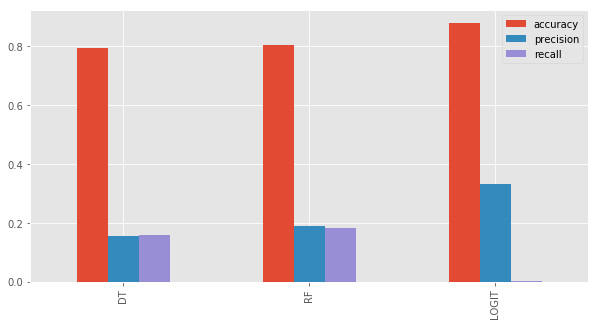

In [412]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
_, axes=plt.subplots(1, sharey=True, figsize=(10,5))
result.plot(kind='bar',ax=axes)

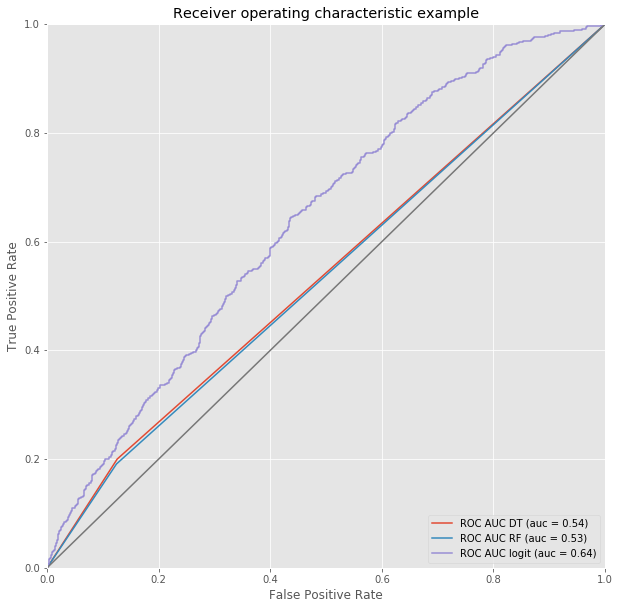

In [447]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
models=[predict_proba_DT,predict_proba_RF,predict_proba_logit]
models_name = ['DT','RF','logit']
plt.figure(figsize=(10, 10)) 
i=0
for model in models:
    fpr, tpr, thresholds = roc_curve(y_valid, model[:,1])
    md=str(models_name[i])
    roc_auc=roc_auc_score(y_valid, model[:,1])
    plt.plot(fpr, tpr, label='ROC AUC %s (auc = %0.2f)' % (md, roc_auc))
    i+=1

plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  

In [448]:

# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
modelss = []
modelss.append(DecisionTreeClassifier())
modelss.append(RandomForestClassifier())
modelss.append(LogisticRegression())

modelss_name = ['DT','RF','Logit']
m_m=0
## Your Code Here  

for model in modelss:
    modelss_name[m_m]=model
    res=cross_val_score(
    modelss_name[m_m],
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10)
    print(modelss_name[m_m])
    print(res)
    m_m+=1


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[ 0.52269504  0.53091861  0.54143026  0.53247214  0.51050321  0.52825903
  0.5448666   0.50551064  0.54257447  0.53849201]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[ 0.62632557  0.6386356   0.54403495  0.61587724  0.59334262  0.62623691
  0.55436508  0.55277447  0.62192

In [449]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = model_logit.predict_proba(X_test)
## Your Code Here

C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Roc_auc на тестовых данных:  0.619226704299


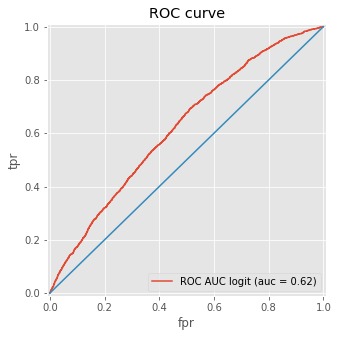

In [450]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
roc_auc=roc_auc_score(y_test, predict[:,1])
plt.plot(fpr, tpr, label='ROC AUC %s (auc = %0.2f)' % ('logit', roc_auc))
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
print('Roc_auc на тестовых данных: ',roc_auc)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)